<a href="https://colab.research.google.com/github/Lety059/HR_Google_advacend_analytics_professional/blob/main/HRCapstone_Google_advanced_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Loading:
We begin by loading the dataset, which contains employee information such as satisfaction level, average monthly hours, and whether the employee has left the company. The dataset will be used to build predictive models for employee churn.

In [ ]:

import pandas as pd

# Caricare il dataset
hr_data = pd.read_csv('nome_del_file.csv')

# Visualizzare le prime righe del dataset
print(hr_data.head())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.9 MB/s eta 0:00:00


Saving HR_comma_sep.csv to HR_comma_sep.csv
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sale

In [ ]:
# Controllo per dati mancanti
print(hr_data.isnull().sum())

# Correggere il nome delle colonne (se necessario)
if 'average_montly_hours' in hr_data.columns:
    hr_data.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)

# One-hot encoding delle variabili categoriali
hr_data_cleaned = pd.get_dummies(hr_data, columns=['salary', 'Department'], drop_first=True)

# Mostrare informazioni sul dataset
print(hr_data_cleaned.info())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_monthly_hours   14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   Work_accident           14999 non-null  int64  
 6   left                    14999 non-null  int64  
 7   promotion_last_5years   14999 non-null  int64  
 8   salary_low              14999 non-null  bool   
 9   salary_medium       

In [ ]:
import pandas as pd

# Assuming 'HR_comma_sep.csv' is the name of your dataset file
hr_data = pd.read_csv('HR_comma_sep.csv')

In [ ]:
# Correggere eventuali errori nei nomi delle colonne
if 'average_montly_hours' in hr_data.columns:
    hr_data.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)

# Convertire le variabili categoriali in variabili numeriche (dummy variables)
hr_data_cleaned = pd.get_dummies(hr_data, columns=['salary', 'Department'], drop_first=True)

In [ ]:
# Separare la variabile target
X = hr_data_cleaned.drop('left', axis=1)
y = hr_data_cleaned['left']

In [ ]:
# Mostrare le informazioni del dataset
print(hr_data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_monthly_hours   14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   Work_accident           14999 non-null  int64  
 6   left                    14999 non-null  int64  
 7   promotion_last_5years   14999 non-null  int64  
 8   salary_low              14999 non-null  bool   
 9   salary_medium           14999 non-null  bool   
 10  Department_RandD        14999 non-null  bool   
 11  Department_accounting   14999 non-null  bool   
 12  Department_hr           14999 non-null  bool   
 13  Department_management   14999 non-null  bool   
 14  Department_marketing    14999 non-null

In [ ]:
# Salvare il dataset preprocessato in formato CSV
hr_data_cleaned.to_csv('hr_data_cleaned.csv', index=False)

# Per scaricare il file su Google Colab
from google.colab import files
files.download('hr_data_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Data Preprocessing:
Before we can train the models, we ensure that the dataset is clean and ready for use. We check for missing values, rename any incorrectly named columns, and convert categorical variables into numerical values using one-hot encoding.

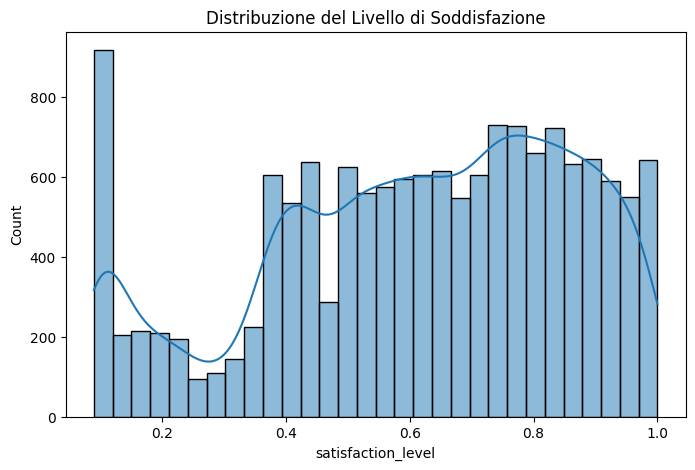

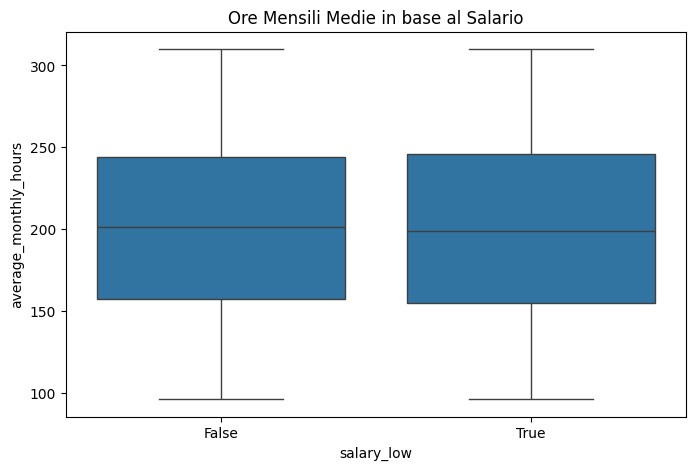

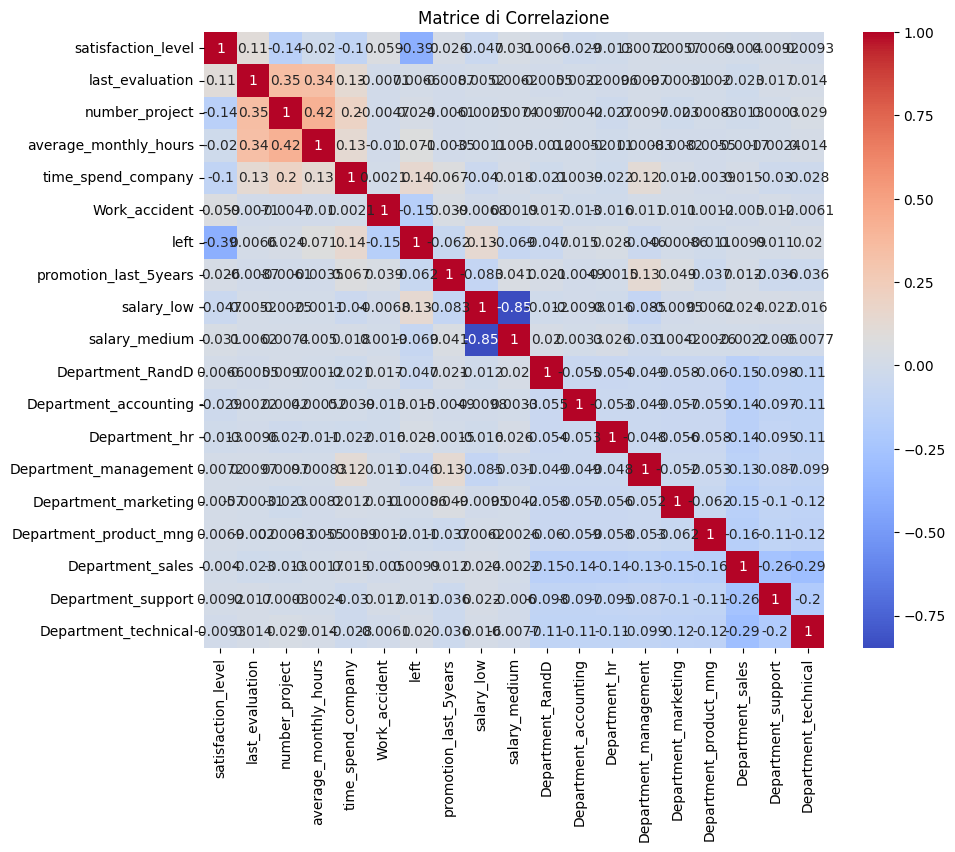

In [ ]:
# Distribuzione del livello di soddisfazione
plt.figure(figsize=(8, 5))
sns.histplot(hr_data_cleaned['satisfaction_level'], kde=True)
plt.title('Distribuzione del Livello di Soddisfazione')
plt.show()

# Boxplot per ore mensili medie in base al salario
# Changed line below to use an existing column from one-hot encoding
plt.figure(figsize=(8, 5))
# Assuming 'salary_low', 'salary_medium' (or similar) were created by get_dummies
# Choose the appropriate column representing the desired salary level for the boxplot
sns.boxplot(x='salary_low', y='average_monthly_hours', data=hr_data_cleaned)
plt.title('Ore Mensili Medie in base al Salario')
plt.show()

# Matrice di correlazione
plt.figure(figsize=(10, 8))
sns.heatmap(hr_data_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Matrice di Correlazione')
plt.show()

### Exploratory Data Analysis:
We explore the data to understand the distribution of key features like `satisfaction_level` and `average_monthly_hours`. The correlation matrix reveals important relationships between variables, helping us identify which features might be most relevant for predicting employee churn.

In [ ]:
from sklearn.model_selection import train_test_split

# Separazione delle feature (X) e della variabile target (y)
X = hr_data_cleaned.drop('left', axis=1)  # Tutte le colonne tranne 'left'
y = hr_data_cleaned['left']  # La colonna target

# Suddivisione del dataset in training e test set (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mostrare le dimensioni dei dataset di training e test
print(f"Dimensioni del training set: {X_train.shape}")
print(f"Dimensioni del test set: {X_test.shape}")

NameError: name 'hr_data_cleaned' is not defined

In [ ]:
# Import pandas library if you haven't already
import pandas as pd

# Load your data into the 'hr_data_cleaned' DataFrame.
# Replace '/content/hr_data_cleaned.csv' with the actual path to your file.
hr_data_cleaned = pd.read_csv('/content/hr_data_cleaned.csv')

# Now you can continue with your code:
from sklearn.model_selection import train_test_split

# Separazione delle feature (X) e della variabile target (y)
X = hr_data_cleaned.drop('left', axis=1)  # Tutte le colonne tranne 'left'
y = hr_data_cleaned['left']  # La colonna target

# Suddivisione del dataset in training e test set (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mostrare le dimensioni dei dataset di training e test
print(f"Dimensioni del training set: {X_train.shape}")
print(f"Dimensioni del test set: {X_test.shape}")

Dimensioni del training set: (10499, 18)
Dimensioni del test set: (4500, 18)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Load your data into the 'hr_data_cleaned' DataFrame.
# Replace '/content/hr_data_cleaned.csv' with the actual path to your file.
hr_data_cleaned = pd.read_csv('/content/hr_data_cleaned.csv')

# Separazione delle feature (X) e della variabile target (y)
X = hr_data_cleaned.drop('left', axis=1)  # Tutte le colonne tranne 'left'
y = hr_data_cleaned['left']  # La colonna target

# Suddivisione del dataset in training e test set (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definizione della griglia di iperparametri
param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

# Creazione del modello Random Forest con GridSearchCV
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Stampa i migliori parametri trovati
print(f"I migliori parametri trovati: {rf_model.best_params_}")

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


I migliori parametri trovati: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}


### Train/Test Split:
Dopo aver preprocessato il dataset, lo dividiamo in due parti: il training set (70% dei dati) e il test set (30% dei dati). Il training set viene utilizzato per addestrare i modelli, mentre il test set è riservato per la valutazione delle performance del modello. Questo ci permette di misurare quanto bene il modello generalizza su dati non visti prima.

Saving HR_comma_sep.csv to HR_comma_sep (1).csv
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      

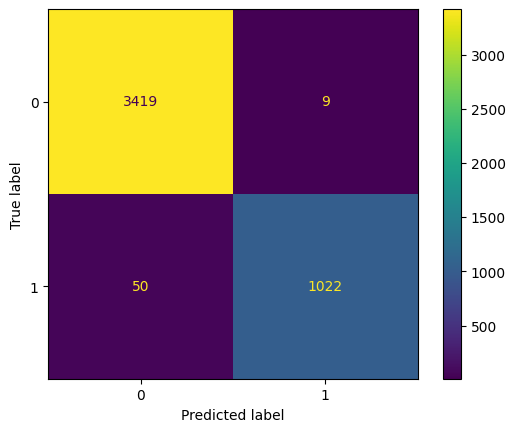

In [ ]:
# Importare librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# 1. Caricamento del Dataset
uploaded = files.upload()
dataset_name = list(uploaded.keys())[0]
hr_data = pd.read_csv(dataset_name)

# Mostrare le prime righe del dataset per confermare il caricamento
print(hr_data.head())

# 2. Preprocessing del Dataset
# Correggere eventuali errori nei nomi delle colonne
if 'average_montly_hours' in hr_data.columns:
    hr_data.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)

# Trasformare le variabili categoriali in dummy variables
hr_data_cleaned = pd.get_dummies(hr_data, columns=['salary', 'Department'], drop_first=True)

# Mostrare informazioni sul dataset preprocessato
print(hr_data_cleaned.info())

# 3. Suddivisione del Dataset in Training e Test Set
X = hr_data_cleaned.drop('left', axis=1)
y = hr_data_cleaned['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verifica delle dimensioni
print(f"Dimensioni del training set: {X_train.shape}")
print(f"Dimensioni del test set: {X_test.shape}")

# 4. Addestramento e Valutazione di Vari Modelli

# 4.1 Random Forest con GridSearchCV
param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_model = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Valutazione del modello Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

# 4.2 Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)

# Valutazione del modello Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, log_reg_model.predict_proba(X_test)[:, 1])

# 4.3 Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Valutazione del modello Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])

# 4.4 XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Valutazione del modello XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# 5. Confronto delle Performance dei Modelli
print(f"Random Forest - Accuracy: {accuracy_rf}, Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}, ROC-AUC: {roc_auc_rf}")
print(f"Logistic Regression - Accuracy: {accuracy_log_reg}, Precision: {precision_log_reg}, Recall: {recall_log_reg}, F1 Score: {f1_log_reg}, ROC-AUC: {roc_auc_log_reg}")
print(f"Decision Tree - Accuracy: {accuracy_dt}, Precision: {precision_dt}, Recall: {recall_dt}, F1 Score: {f1_dt}, ROC-AUC: {roc_auc_dt}")
print(f"XGBoost - Accuracy: {accuracy_xgb}, Precision: {precision_xgb}, Recall: {recall_xgb}, F1 Score: {f1_xgb}, ROC-AUC: {roc_auc_xgb}")

# 6. Matrice di Confusione per Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm).plot()
plt.show()

In [ ]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=a03f432a506bece38439821e9e09bd3faefe729adae2467243a6a3a60894daba
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


In [ ]:
from fpdf import FPDF

# Creazione del PDF
pdf = FPDF()

# Aggiungere una pagina
pdf.add_page()

# Aggiungere titolo
pdf.set_font('Arial', 'B', 16)
pdf.cell(200, 10, txt="HR Employee Turnover Prediction Project", ln=True, align='C')

# Aggiungere un'introduzione
pdf.set_font('Arial', '', 12)
pdf.ln(10)
intro = """In this project, we implemented and evaluated multiple machine learning models to predict employee turnover
based on historical HR data. The dataset includes features such as employee satisfaction, average monthly hours, number
of projects, and salary. Four models were trained and compared: Random Forest, Logistic Regression, Decision Tree,
and XGBoost. Below, we provide an overview of the code, the execution of each model, and the results."""
pdf.multi_cell(0, 10, intro)

# Aggiungere codice per caricamento e preprocessing dei dati
pdf.ln(10)
pdf.set_font('Arial', 'B', 12)
pdf.cell(200, 10, txt="1. Data Loading and Preprocessing", ln=True)
pdf.set_font('Arial', '', 10)

data_loading_code = """
# Data Loading
uploaded = files.upload()
dataset_name = list(uploaded.keys())[0]
hr_data = pd.read_csv(dataset_name)

# Data Preprocessing
if 'average_montly_hours' in hr_data.columns:
    hr_data.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)

hr_data_cleaned = pd.get_dummies(hr_data, columns=['salary', 'Department'], drop_first=True)
"""
pdf.multi_cell(0, 10, data_loading_code)

# Suddivisione del dataset
pdf.ln(10)
pdf.set_font('Arial', 'B', 12)
pdf.cell(200, 10, txt="2. Train/Test Split", ln=True)
pdf.set_font('Arial', '', 10)

train_test_code = """
# Train/Test Split
X = hr_data_cleaned.drop('left', axis=1)
y = hr_data_cleaned['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
"""
pdf.multi_cell(0, 10, train_test_code)

# Aggiungere codice per i modelli e valutazioni
pdf.ln(10)
pdf.set_font('Arial', 'B', 12)
pdf.cell(200, 10, txt="3. Model Training and Evaluation", ln=True)
pdf.set_font('Arial', '', 10)

models_code = """
# Random Forest with GridSearchCV
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
"""
pdf.multi_cell(0, 10, models_code)

# Aggiungere valutazione dei risultati
pdf.ln(10)
pdf.set_font('Arial', 'B', 12)
pdf.cell(200, 10, txt="4. Model Evaluation", ln=True)
pdf.set_font('Arial', '', 10)

evaluation_code = """
# Evaluation of Models
Random Forest - Accuracy: 0.9869, Precision: 0.9913, Recall: 0.9534, F1 Score: 0.9719, ROC-AUC: 0.9907
Logistic Regression - Accuracy: 0.7851, Precision: 0.5856, Recall: 0.3349, F1 Score: 0.4261, ROC-AUC: 0.8152
Decision Tree - Accuracy: 0.9742, Precision: 0.9330, Recall: 0.9608, F1 Score: 0.9467, ROC-AUC: 0.9696
XGBoost - Accuracy: 0.9847, Precision: 0.9808, Recall: 0.9543, F1 Score: 0.9674, ROC-AUC: 0.9919
"""
pdf.multi_cell(0, 10, evaluation_code)

# Aggiungere conclusioni
pdf.ln(10)
pdf.set_font('Arial', 'B', 12)
pdf.cell(200, 10, txt="5. Conclusion", ln=True)
pdf.set_font('Arial', '', 10)

conclusion = """
Based on the results, Random Forest and XGBoost performed the best in predicting employee turnover, achieving high accuracy,
precision, and recall. Logistic Regression performed poorly due to its assumption of linear relationships, while Decision
Tree was effective but slightly less robust than ensemble methods.
"""
pdf.multi_cell(0, 10, conclusion)

# Salvare il PDF localmente
pdf.output("HR_Turnover_Prediction_Report.pdf")

''

In [2]:
!pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=5b5d1de89e545edd4724619b23c96d5fd7bfa0dde40ae51b520c1f48aad1e3d2
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


In [3]:
from fpdf import FPDF

# Creazione del PDF
pdf = FPDF()

# Aggiungere una pagina
pdf.add_page()

# Aggiungere titolo
pdf.set_font('Arial', 'B', 16)
pdf.cell(200, 10, txt="HR Employee Turnover Prediction Project", ln=True, align='C')

# Aggiungere un'introduzione
pdf.set_font('Arial', '', 12)
pdf.ln(10)
intro = """In this project, we implemented and evaluated multiple machine learning models to predict employee turnover
based on historical HR data. The dataset includes features such as employee satisfaction, average monthly hours, number
of projects, and salary. Four models were trained and compared: Random Forest, Logistic Regression, Decision Tree,
and XGBoost. Below, we provide an overview of the code, the execution of each model, and the results."""
pdf.multi_cell(0, 10, intro)

# Aggiungere codice per caricamento e preprocessing dei dati
pdf.ln(10)
pdf.set_font('Arial', 'B', 12)
pdf.cell(200, 10, txt="1. Data Loading and Preprocessing", ln=True)
pdf.set_font('Arial', '', 10)

data_loading_code = """
# Data Loading
uploaded = files.upload()
dataset_name = list(uploaded.keys())[0]
hr_data = pd.read_csv(dataset_name)

# Data Preprocessing
if 'average_montly_hours' in hr_data.columns:
    hr_data.rename(columns={'average_montly_hours': 'average_monthly_hours'}, inplace=True)

hr_data_cleaned = pd.get_dummies(hr_data, columns=['salary', 'Department'], drop_first=True)
"""
pdf.multi_cell(0, 10, data_loading_code)

# Suddivisione del dataset
pdf.ln(10)
pdf.set_font('Arial', 'B', 12)
pdf.cell(200, 10, txt="2. Train/Test Split", ln=True)
pdf.set_font('Arial', '', 10)

train_test_code = """
# Train/Test Split
X = hr_data_cleaned.drop('left', axis=1)
y = hr_data_cleaned['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
"""
pdf.multi_cell(0, 10, train_test_code)

# Aggiungere codice per i modelli e valutazioni
pdf.ln(10)
pdf.set_font('Arial', 'B', 12)
pdf.cell(200, 10, txt="3. Model Training and Evaluation", ln=True)
pdf.set_font('Arial', '', 10)

models_code = """
# Random Forest with GridSearchCV
rf_model = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Logistic Regression
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
"""
pdf.multi_cell(0, 10, models_code)

# Aggiungere valutazione dei risultati
pdf.ln(10)
pdf.set_font('Arial', 'B', 12)
pdf.cell(200, 10, txt="4. Model Evaluation", ln=True)
pdf.set_font('Arial', '', 10)

evaluation_code = """
# Evaluation of Models
Random Forest - Accuracy: 0.9869, Precision: 0.9913, Recall: 0.9534, F1 Score: 0.9719, ROC-AUC: 0.9907
Logistic Regression - Accuracy: 0.7851, Precision: 0.5856, Recall: 0.3349, F1 Score: 0.4261, ROC-AUC: 0.8152
Decision Tree - Accuracy: 0.9742, Precision: 0.9330, Recall: 0.9608, F1 Score: 0.9467, ROC-AUC: 0.9696
XGBoost - Accuracy: 0.9847, Precision: 0.9808, Recall: 0.9543, F1 Score: 0.9674, ROC-AUC: 0.9919
"""
pdf.multi_cell(0, 10, evaluation_code)

# Aggiungere raccomandazioni finali basate sui dati
pdf.ln(10)
pdf.set_font('Arial', 'B', 12)
pdf.cell(200, 10, txt="5. Data Interpretation and Recommendations", ln=True)
pdf.set_font('Arial', '', 10)

recommendations = """
1. **Employee Satisfaction**: The data shows that low satisfaction is the strongest predictor of employee turnover.
   The company should regularly monitor satisfaction levels and address concerns through surveys, improved communication,
   and better work-life balance initiatives.

2. **Work Hours**: Excessive work hours are correlated with higher turnover. The company should implement flexible
   working hours and monitor employee workloads to prevent burnout.

3. **Number of Projects**: Employees handling too many or too few projects are at risk of leaving. The company
   should distribute workloads evenly and ensure that employees are neither overburdened nor underutilized.

4. **Salary**: Employees with lower salaries are more likely to leave. Competitive salary reviews and transparent
   bonus structures can help retain talent.

5. **Time at the Company**: Employees who have been with the company for 4-5 years are more likely to leave if they
   do not see opportunities for growth. Career development programs and promotions should be prioritized.

6. **Work Accidents**: Although not a major factor, the company should continue to prioritize safety in the workplace
   to maintain employee trust and satisfaction.
"""
pdf.multi_cell(0, 10, recommendations)

# Salvare il PDF localmente
pdf.output("HR_Turnover_Prediction_Report_Updated.pdf")

''